In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from pyproj import Proj, Transformer
#import pyproj
import folium
from shapely.geometry import Point as point
import seaborn as sns
import random as rd
df = pd.read_excel("220510_송장_좌표데이터.xlsx")
df

,Unnamed: 0,위도,경도
0,0,37.735348,127.039431
1,1,37.735348,127.039431
2,2,37.735348,127.039431
3,3,37.735348,127.039431
4,4,37.735312,127.041107
...,...,...,...
338,338,37.735438,127.039950
339,339,37.735150,127.040889
340,340,37.733967,127.042621
341,341,37.734834,127.041135


In [7]:
X = df.iloc[:,[2]].values
Y = df.iloc[:,[1]].values
Z = np.hstack([X,Y])
Z

array([[127.0394312 ,  37.73534841],
       [127.0394312 ,  37.73534841],
       [127.0394312 ,  37.73534841],
       [127.0394312 ,  37.73534841],
       [127.0411074 ,  37.7353118 ],
       [127.0386193 ,  37.73387334],
       [127.0388099 ,  37.73503778],
       [127.0388099 ,  37.73503778],
       [127.0388099 ,  37.73503778],
       [127.0388099 ,  37.73503778],
       [127.0391383 ,  37.73375829],
       [127.0388547 ,  37.73392507],
       [127.0388547 ,  37.73392507],
       [127.0386193 ,  37.73386208],
       [127.0386193 ,  37.73386208],
       [127.0391948 ,  37.73334158],
       [127.0394387 ,  37.73335726],
       [127.038883  ,  37.73371784],
       [127.0391099 ,  37.73372677],
       [127.04002   ,  37.73331427],
       [127.04002   ,  37.73331427],
       [127.04002   ,  37.73331427],
       [127.04002   ,  37.73331427],
       [127.0403547 ,  37.73330064],
       [127.0393849 ,  37.73349017],
       [127.0400656 ,  37.73360031],
       [127.0400656 ,  37.73360031],
 

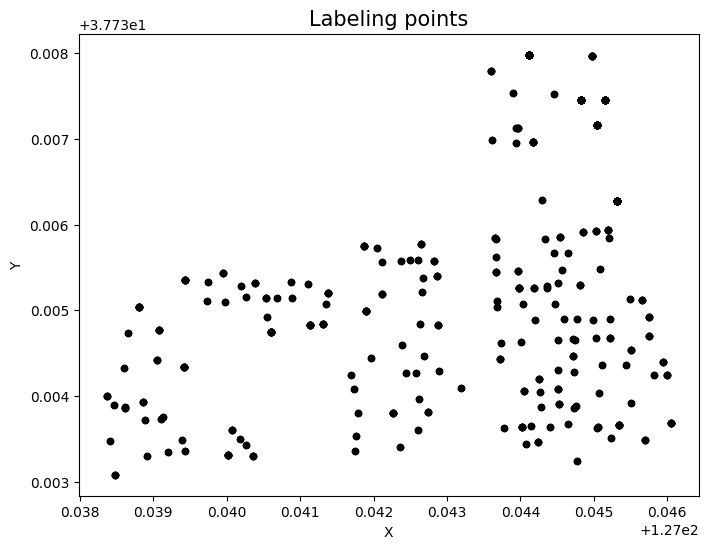

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(X,Y,s=20,color="black")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Labeling points",fontsize=15)
for i in range(len(X)):
    plt.scatter(X[i], Y[i], color="black", s=20)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow curve')

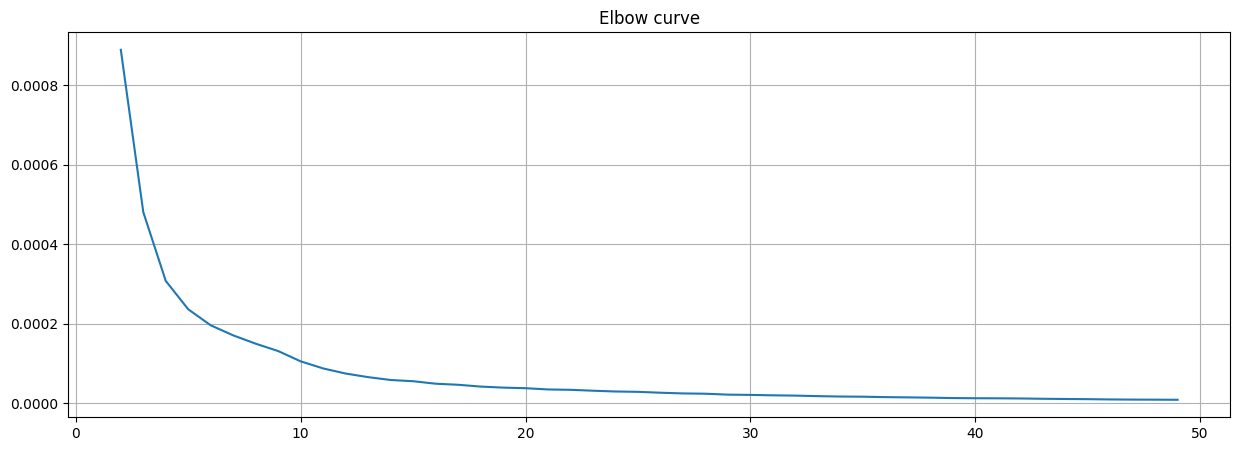

In [11]:
from sklearn.cluster import KMeans
distortions = []
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Z)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 50), distortions)
plt.grid(True)
plt.title('Elbow curve')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[127.0449927  127.0452252  127.0445899  127.0447714  127.0450266
  37.73489143  37.73489584  37.73489383  37.73490277  37.73468194]
[127.040387   127.040387   127.0401884  127.0402593  127.0405315
 127.040679   127.0405315   37.7353143   37.7353143   37.73528058
  37.73515442  37.73514532  37.73513851  37.73514532]
[127.0450366 127.0450366 127.0450366 127.0450366 127.0450366 127.0450366
 127.0450366 127.0450366 127.0450366 127.0450366 127.0450366 127.0450366
  37.7371596  37.7371596  37.7371596  37.7371596  37.7371596  37.7371596
  37.7371596  37.7371596  37.7371596  37.7371596  37.7371596  37.7371596]
[127.0384743  127.0384743  127.0384121   37.73308053  37.73308053
  37.73347022]
[127.0428712 127.0428712 127.0426386  37.7348269  37.7348269  37.7348405]
[127.0441181  127.0441181  127.0441181  127.0441181  127.0441181
 127.0441181  127.0441181  127.0441181  127.0441181  127.0441181
 127.0441181  127.0441181  127.0441181  127.0441181  127.0441181
 127.0441181  127.0441181  127.0441181  

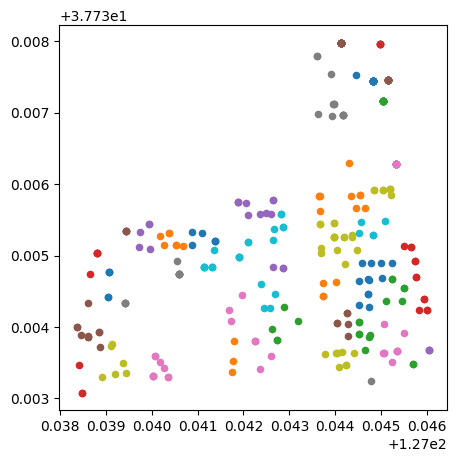

In [19]:
#K-means 결과
"""
K = 50
model = KMeans(n_clusters = K)
model.fit(Z)

plt.figure(figsize=(5,5))
for k in range(K):
    plt.scatter(Z[model.labels_ ==k,0], Z[model.labels_==k,1],s=20)
    Ck = []
    Ck = np.append(Z[model.labels_ ==k,0], Z[model.labels_==k])
    print(Ck)
"""
#K-means 결과
K = 50
model = KMeans(n_clusters = K)
model.fit(Z)
#print(Z[model.labels_,1])

plt.figure(figsize=(5,5))
for k in range(K):
    plt.scatter(Z[model.labels_ ==k,0], Z[model.labels_==k,1],s=20)
    Ck = []
    Ck = np.append(Z[model.labels_ ==k,0], Z[model.labels_==k,1])
    print(Ck)
print("\n")
#print(Z[model.labels_==1,0])
cnt=0
sum=0
cnt2=0
sum2=0
#CL=np.ones((10, 3), float)
CL=np.empty((0,3),float)
for a in range(K): 
  for j in Z[model.labels_==a,0]:
    sum+=j
    cnt+=1
  for b in Z[model.labels_==a,1]:
    sum2+=b
    cnt2+=1
  CL=np.append(CL,np.array([[(sum/cnt),(sum2/cnt2),cnt2]]),axis=0)
  cnt=0
  sum=0
  cnt2=0
  sum2=0
  #print(CL)

print(CL)

In [20]:
import csv

In [21]:
df2 = pd.DataFrame(CL)
df2.to_csv('CL.csv')

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
meanshift = MeanShift(bandwidth=0.002)
cluster_labels = meanshift.fit_predict(Z)

print(f"Mean Shift Cluster 유형: {np.unique(cluster_labels)}")

Mean Shift Cluster 유형: [0 1 2]


In [ ]:
bandwidth = estimate_bandwidth(Z)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 0.002


In [ ]:
best_bandwidth = estimate_bandwidth(Z)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(Z)
print('best bandwidth cluster labels 유형:',np.unique(cluster_labels))

best bandwidth cluster labels 유형: [0 1 2]


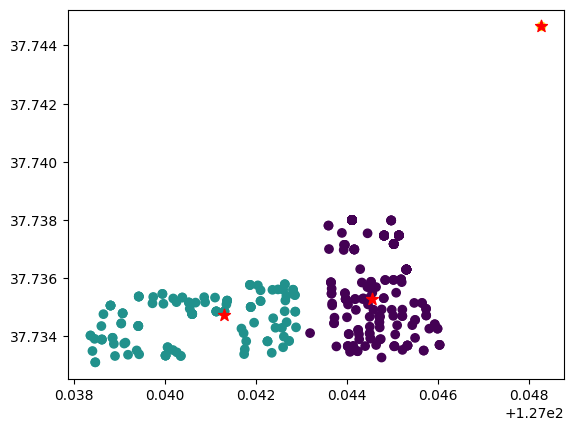

In [ ]:
#MeanShift 결과
mshclust=MeanShift(bandwidth=0.002).fit(Z)
mshclust
labels = mshclust.labels_
centers = mshclust.cluster_centers_

plt.scatter(Z[:,0], Z[:,1], c=labels)
plt.scatter(centers[:,0],centers[:,1], marker='*', color="r",s=80 )
plt.show()

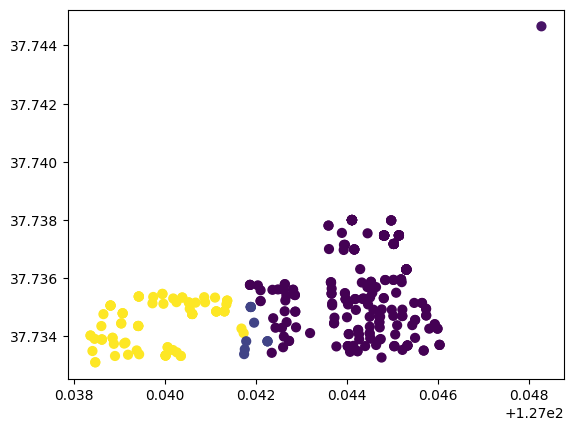

In [ ]:
#GMM 결과
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=30).fit(Z)
labels = gmm.predict(Z)
plt.scatter(Z[:, 0], Z[:, 1], c=labels, s=40, cmap='viridis')


In [ ]:
probs = gmm.predict_proba(Z)
print(probs[:5].round(3))

[[0.    0.07  0.    0.103 0.    0.    0.001 0.    0.001 0.    0.111 0.021
  0.016 0.096 0.    0.101 0.    0.016 0.001 0.    0.    0.092 0.002 0.021
  0.119 0.    0.181 0.02  0.025 0.001]
 [0.    0.07  0.    0.103 0.    0.    0.001 0.    0.001 0.    0.111 0.021
  0.016 0.096 0.    0.101 0.    0.016 0.001 0.    0.    0.092 0.002 0.021
  0.119 0.    0.181 0.02  0.025 0.001]
 [0.    0.07  0.    0.103 0.    0.    0.001 0.    0.001 0.    0.111 0.021
  0.016 0.096 0.    0.101 0.    0.016 0.001 0.    0.    0.092 0.002 0.021
  0.119 0.    0.181 0.02  0.025 0.001]
 [0.    0.07  0.    0.103 0.    0.    0.001 0.    0.001 0.    0.111 0.021
  0.016 0.096 0.    0.101 0.    0.016 0.001 0.    0.    0.092 0.002 0.021
  0.119 0.    0.181 0.02  0.025 0.001]
 [0.011 0.079 0.003 0.082 0.011 0.008 0.023 0.    0.006 0.004 0.111 0.025
  0.022 0.083 0.004 0.088 0.002 0.012 0.012 0.008 0.005 0.07  0.011 0.025
  0.092 0.002 0.134 0.025 0.034 0.007]]


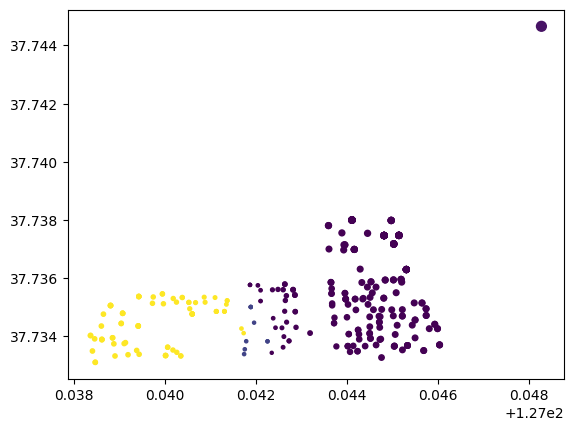

In [ ]:
size = 50 * probs.max(1) # square는 차이점을 강조
plt.scatter(Z[:, 0], Z[:, 1], c=labels, cmap='viridis', s=size);

Text(0, 0.5, '특성 1')

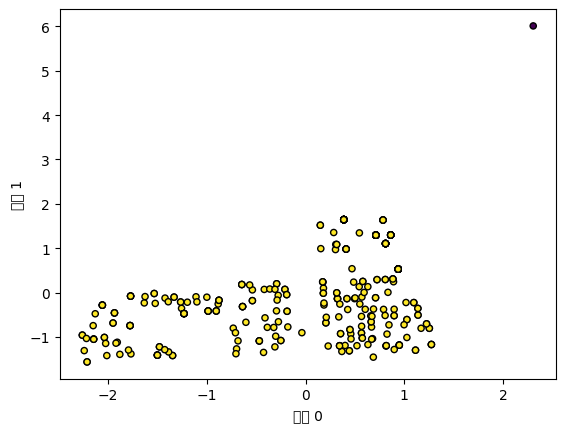

In [ ]:
#DBSCAN 결과
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

scaler = StandardScaler()
scaler.fit(Z)
Z_scaled = scaler.transform(Z)

dbscan = DBSCAN(eps=0.7, min_samples=2)
clusters = dbscan.fit_predict(Z_scaled)
# 클러스터 할당을 표시합니다
plt.scatter(Z_scaled[:, 0], Z_scaled[:, 1], c=clusters, cmap='viridis', s=20, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")